In [1]:
%load_ext autoreload
%autoreload 2

# Beeline Test

Test of Causal CNN using a curated beeline dataset.

In [2]:
import pickle, torch, json
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import networkx as nx

from multiprocessing import cpu_count
from runTCDF import runTCDF
from network_analysis import plot_graph, scores, plot_scores, plot_cartography

In [3]:
path = './beeline_data/curated/VSC-2000-1/'

In [4]:
gem = pd.read_csv(path + 'ExpressionData.csv', index_col = 0)
pseudotime = pd.read_csv(path + 'PseudoTime.csv', index_col = 0)
ref = pd.read_csv(path + 'refNetwork.csv')

In [5]:
pseudo_sort1 = pseudotime.sort_values(by='PseudoTime1') 
pseudo_cells1 = list(pseudo_sort1[pseudo_sort1['PseudoTime1'].isna() == False].index) #cells order by pseudotime

In [6]:
expression_matrix = gem.T.reindex(pseudo_cells1)

In [7]:
expression_matrix.head()

,Dbx1,Dbx2,Irx3,Nkx22,Nkx61,Nkx62,Olig2,Pax6
E522_1,1.033533,0.907122,0.758465,1.039379,1.015667,1.102170,0.866860,1.163163
E122_1,0.862777,0.836384,0.913651,0.940329,0.895425,0.850634,1.012994,1.061644
E1039_1,0.981188,0.880960,0.950827,0.926463,0.988591,1.151053,1.152323,1.200519
E1499_1,1.085361,0.939220,1.005789,0.924845,0.655055,0.859853,0.995676,0.935665
E400_2,1.030818,0.893090,0.798885,0.735014,1.106134,0.753199,0.893607,1.044752


In [8]:
links = runTCDF(expression_matrix, cuda=True, significance=0.8, log_interval=1)

Number of genes:  0 [0%]
Number of genes:  1 [12%]
Number of genes:  2 [25%]
Number of genes:  3 [38%]
Number of genes:  4 [50%]
Number of genes:  5 [62%]
Number of genes:  6 [75%]
Number of genes:  7 [88%]


In [9]:
expression_matrix['time'] = pseudo_sort1[pseudo_sort1['PseudoTime1'].isna() == False]['PseudoTime1']

In [10]:
expression_matrix.head()

,Dbx1,Dbx2,Irx3,Nkx22,Nkx61,Nkx62,Olig2,Pax6,time
E522_1,1.033533,0.907122,0.758465,1.039379,1.015667,1.102170,0.866860,1.163163,0.00000
E122_1,0.862777,0.836384,0.913651,0.940329,0.895425,0.850634,1.012994,1.061644,0.00000
E1039_1,0.981188,0.880960,0.950827,0.926463,0.988591,1.151053,1.152323,1.200519,0.00000
E1499_1,1.085361,0.939220,1.005789,0.924845,0.655055,0.859853,0.995676,0.935665,0.00000
E400_2,1.030818,0.893090,0.798885,0.735014,1.106134,0.753199,0.893607,1.044752,0.00201


<AxesSubplot:xlabel='time', ylabel='Dbx2'>

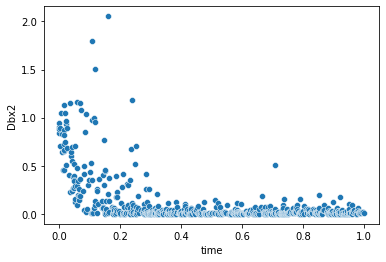

In [11]:
sns.scatterplot(data=expression_matrix, x='time', y='Dbx2')

<AxesSubplot:xlabel='time', ylabel='Dbx1'>

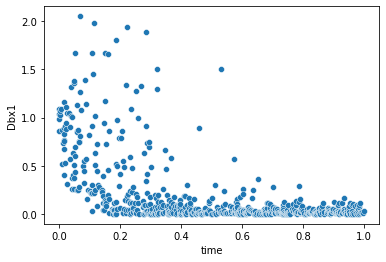

In [12]:
sns.scatterplot(data=expression_matrix, x='time', y='Dbx1')

<AxesSubplot:xlabel='Dbx1', ylabel='Nkx62'>

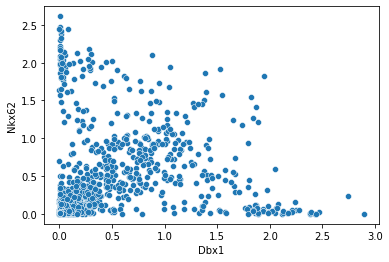

In [13]:
sns.scatterplot(data=gem.T, x='Dbx1', y='Nkx62')

In [14]:
np.corrcoef(expression_matrix['Dbx1'], expression_matrix['Nkx62'])[0][1]

0.6164926227483747

In [15]:
links

,TF,importance,target
0,Dbx2,1.872656,Dbx1
0,Irx3,1.976347,Dbx2
0,Dbx2,2.972033,Irx3
0,Pax6,1.783372,Nkx22
1,Olig2,1.762059,Nkx22
0,Dbx2,2.050405,Nkx62
1,Dbx1,1.534238,Nkx62


In [16]:
scores(links[["TF", "target"]])

,genes,eigenvector_centrality,betweenness_centrality,closeness_centrality,in_degree_centrality,out_degree_centrality,all_degree_centrality,degree_out,degree_in,degree_all,z_scores,membership,participation,classification
0,Dbx1,3.779645e-01,0.000000,0.222222,0.166667,0.166667,0.333333,1,1,2,-0.577350,0,0.7500,R2: Peripheral
1,Dbx2,3.779645e-01,0.066667,0.166667,0.166667,0.500000,0.666667,3,1,4,1.732051,0,0.4375,R2: Peripheral
2,Irx3,3.779645e-01,0.000000,0.166667,0.166667,0.166667,0.333333,1,1,2,-0.577350,0,0.7500,R2: Peripheral
3,Nkx22,4.055119e-06,0.000000,0.333333,0.333333,0.000000,0.333333,0,2,2,1.414214,1,1.0000,R2: Peripheral
4,Nkx62,7.559289e-01,0.000000,0.375000,0.333333,0.000000,0.333333,0,2,2,-0.577350,0,1.0000,R2: Peripheral
5,Olig2,9.011376e-08,0.000000,0.000000,0.000000,0.166667,0.166667,1,0,1,-0.707107,1,0.0000,R1: Ultra-peripheral
6,Pax6,9.011376e-08,0.000000,0.000000,0.000000,0.166667,0.166667,1,0,1,-0.707107,1,0.0000,R1: Ultra-peripheral


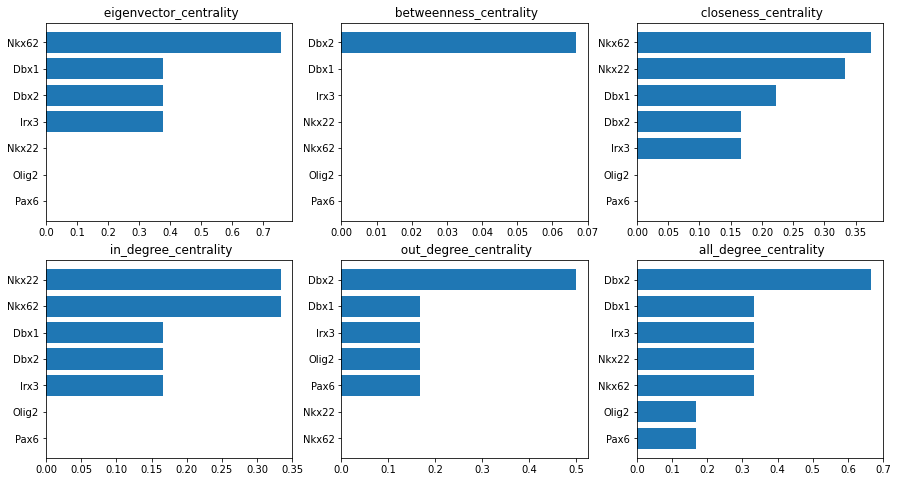

In [17]:
plot_scores(scores(links[["TF", "target"]]))

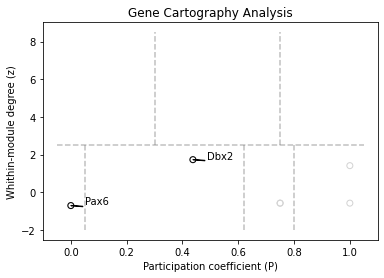

In [19]:
plot_cartography(scores(links[["TF", "target"]]), highlight_genes=['Pax6', 'Dbx2'])

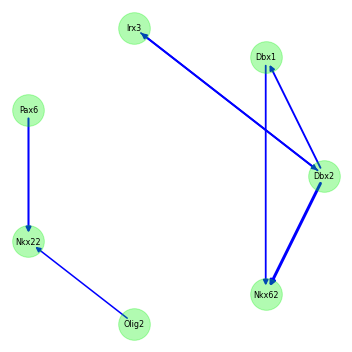

In [18]:
plot_graph(links, type="links")

In [19]:
ref

,Gene1,Gene2,Type
0,Nkx22,Pax6,-
1,Nkx61,Nkx62,-
2,Dbx1,Nkx62,-
3,Irx3,Olig2,-
4,Nkx22,Olig2,-
5,Nkx62,Dbx1,-
6,Nkx61,Dbx1,-
7,Nkx61,Dbx2,-
8,Olig2,Dbx2,-
9,Nkx22,Dbx2,-


In [68]:
scores(ref[["Gene1", "Gene2"]])

,genes,eigenvector_centrality,betweenness_centrality,closeness_centrality,in_degree_centrality,out_degree_centrality,all_degree_centrality,degree_out,degree_in,degree_all,z_scores,membership,participation,classification
0,Dbx1,0.287703,0.000000,0.388889,0.285714,0.142857,0.428571,1,2,3,0.707107,1,0.888889,R2: Peripheral
1,Dbx2,0.530711,0.476190,0.510204,0.428571,0.285714,0.714286,2,3,4,-0.442326,0,0.920000,R2: Peripheral
2,Irx3,0.390752,0.000000,0.396825,0.285714,0.142857,0.428571,1,2,3,-0.442326,0,0.888889,R2: Peripheral
3,Nkx22,0.370155,0.333333,0.396825,0.285714,0.571429,0.857143,4,2,6,1.769303,0,0.555556,R2: Peripheral
4,Nkx61,0.272539,0.238095,0.324675,0.142857,0.428571,0.571429,3,1,4,-1.414214,1,0.687500,R2: Peripheral
5,Nkx62,0.287703,0.000000,0.388889,0.285714,0.142857,0.428571,1,2,3,0.707107,1,0.888889,R2: Peripheral
6,Olig2,0.390752,0.142857,0.396825,0.285714,0.285714,0.571429,2,2,4,0.294884,0,0.750000,R2: Peripheral
7,Pax6,0.190087,0.000000,0.274725,0.142857,0.142857,0.285714,1,1,2,-1.179536,0,0.750000,R2: Peripheral


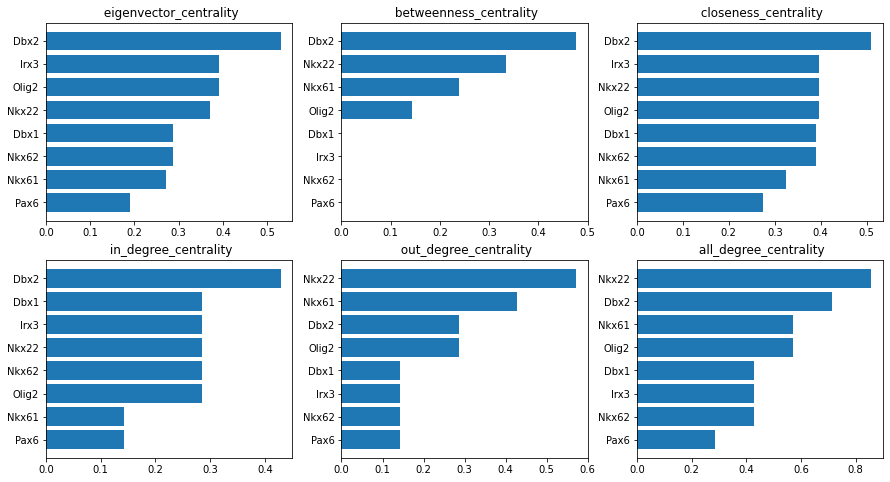

In [69]:
plot_scores(scores(ref[["Gene1", "Gene2"]]))

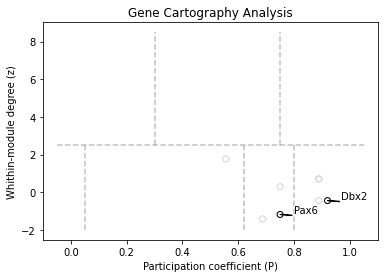

In [20]:
plot_cartography(scores(ref[["Gene1", "Gene2"]]), highlight_genes=['Pax6', 'Dbx2'])

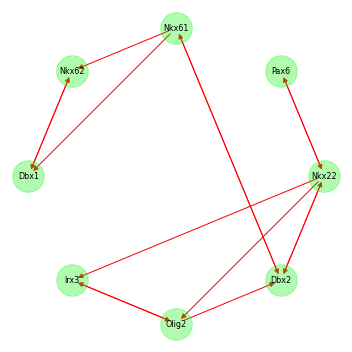

In [21]:
plot_graph(ref, type="ref")

In [22]:
#compute correlations
corr = []
for row in np.arange(ref.shape[0]):
    corr.append(np.corrcoef(expression_matrix[ref['Gene1'][row]], expression_matrix[ref['Gene2'][row]])[0][1])

In [23]:
corr

[-0.45882286333241634,
 -0.4954479510127249,
 0.6164926227483747,
 -0.556674971845291,
 -0.5250424860676203,
 0.6164926227483747,
 -0.49929409251086077,
 -0.5527293782889778,
 -0.45491984446380146,
 0.3978536835690811,
 -0.5527293782889778,
 -0.4588228633324163,
 0.3978536835690811,
 -0.556674971845291,
 0.4840094950647097]